# Предсказания победителя в онлайн-игре

# Gradient Boosting

In [1]:
import pandas
data = pandas.read_csv('./features.csv', index_col='match_id')
data_test = pandas.read_csv('./features_test.csv', index_col='match_id')

# game result columns
features = data.copy()
for column in ['duration','radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']:
    features.drop(column, axis=1, inplace=True)


features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [2]:
for column in features.columns:
    filledRowsCount = features[column].count()
    if filledRowsCount != len(features):
        print column + " = " + str(filledRowsCount) + " ~ " + str(int(100 / (97230.0 / (97230 - filledRowsCount)))) + "% empty"
    


first_blood_time = 77677 ~ 20% empty
first_blood_team = 77677 ~ 20% empty
first_blood_player1 = 77677 ~ 20% empty
first_blood_player2 = 53243 ~ 45% empty
radiant_bottle_time = 81539 ~ 16% empty
radiant_courier_time = 96538 ~ 0% empty
radiant_flying_courier_time = 69751 ~ 28% empty
radiant_first_ward_time = 95394 ~ 1% empty
dire_bottle_time = 81087 ~ 16% empty
dire_courier_time = 96554 ~ 0% empty
dire_flying_courier_time = 71132 ~ 26% empty
dire_first_ward_time = 95404 ~ 1% empty


In [3]:
features.fillna(value = 0, inplace = True)

In [4]:
results = data['radiant_win']

In [5]:
import time
import datetime
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

ns = np.array(range(10, 51, 10))
scores = []
scores_std = []
scores_text = []
for n in ns:
    print "The number of boosting stages: " + str(n)
    
    start_time = datetime.datetime.now()
    
    fold = KFold(n=len(features), n_folds=5, shuffle=True)

    X = features.as_matrix()
    y = results

    clf = GradientBoostingClassifier(n_estimators=n, verbose=0)

    score_list = cross_val_score(estimator=clf, X=X, y=y, cv=fold, scoring='roc_auc').tolist()

    scores.append(np.mean(score_list))
    scores_std.append(np.std(score_list))
    
    scores_text.append(str(n) + " : " + str(np.mean(score_list)))
    
    print 'Score: ' + str(np.mean(score_list))
    print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"

The number of boosting stages: 10
Score: 0.666303954274
Time elapsed: 0:00:23.200000 

The number of boosting stages: 20
Score: 0.681845396867
Time elapsed: 0:00:42.538000 

The number of boosting stages: 30
Score: 0.689606090825
Time elapsed: 0:01:04.341000 

The number of boosting stages: 40
Score: 0.694587912937
Time elapsed: 0:01:28.477000 

The number of boosting stages: 50
Score: 0.696848871507
Time elapsed: 0:01:47.980000 



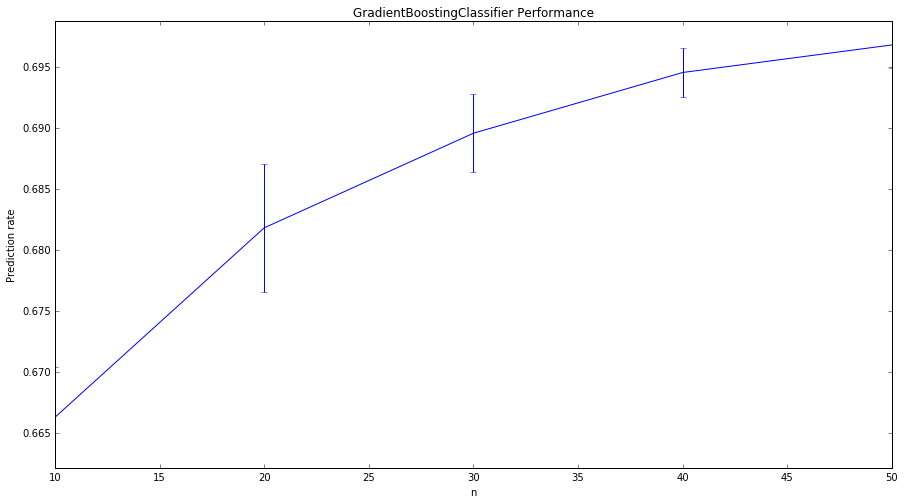

In [6]:
# Do the plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(15, 8))
plt.clf()
plt.errorbar(ns, scores, np.array(scores_std))
plt.title('GradientBoostingClassifier Performance')
plt.xlabel('n')
plt.ylabel('Prediction rate')
plt.axis('tight')
plt.show()

In [7]:
features_test = data_test.copy()

#for column in ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']:
#    features_test.drop(column, axis=1, inplace=True)

# Replace empty cells with 0
features_test.fillna(value = 0, inplace = True)

start_time = datetime.datetime.now()

X = features.as_matrix()
y = results

clf = GradientBoostingClassifier(n_estimators=30, verbose=0)
clf.fit(X, y)  

est_test = clf.predict_proba(features_test)[:,1]

print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"

print 'Minimum predict value =', np.min(est_test)
print 'Maximum predict value =', np.max(est_test)


Time elapsed: 0:00:10.822000 

Minimum predict value = 0.248606637718
Maximum predict value = 0.787497900013


# Ответы на вопросы

#### 1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

##### Следующие столбцы имеют пропуски (имя столбца = количество заполненных значений ~ количество пустых в процентах):

first_blood_time = 77677 ~ 20% empty

first_blood_team = 77677 ~ 20% empty

first_blood_player1 = 77677 ~ 20% empty

first_blood_player2 = 53243 ~ 45% empty

radiant_bottle_time = 81539 ~ 16% empty

radiant_courier_time = 96538 ~ 0% empty

radiant_flying_courier_time = 69751 ~ 28% empty

radiant_first_ward_time = 95394 ~ 1% empty

dire_bottle_time = 81087 ~ 16% empty

dire_courier_time = 96554 ~ 0% empty

dire_flying_courier_time = 71132 ~ 26% empty

dire_first_ward_time = 95404 ~ 1% empty


В списке указано количество непустых значений. Они меньше 97230. Затем, процент пропусков. 
Больше всего пустых значений в столбцах first_blood_player2 и radiant_flying_courier_time. 

first_blood_player2 сожержит идентификторы игроков причастных к событию "первая кровь". При этом, есть столбец first_blood_player1 который тоже относится к тому-же событию, но имеет меньше пустых значений. Значения в столбцах first_blood_player1 и first_blood_player2 могут быть пустые если событие "первая кровь" не успело произойти за первые 5 минут. Но в случае, если причиной "первой крови" первого игрока не стал один из игроков, значение  first_blood_player2 остается пустым, даже если событие успело произойти.

radiant_flying_courier_time - второй столбец с большим количеством пустых значений. Пустые значения означают что предмет "flying_courier" не был приобретен в течении первых 5 минут.


#### 2. Как называется столбец, содержащий целевую переменную?

Cтолбец содержащий целевую переменную: radiant_win

#### 3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти выше по тексту. Какое качество при этом получилось? 

1 минуту и 4 секунды. Качество: 0.689606090825

#### 4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что можно сделать, чтобы ускорить его обучение при увеличении количества деревьев? 

Да, имеет смысл. 40 и 50 деревьев увеличивиют качество предсказания. Для ускорения обучения можено уменьшить количество
элементов в выборке или ограничить глубину деревьев.

# Логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорение анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия. В данном разделе предлгается применить ее к данным, а также попробовать различные манипуляции с признаками.

In [17]:
# Logistic Regression
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# game result columns
features_log = data.copy()
for column in ['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']:
    features_log.drop(column, axis=1, inplace=True)

# Replace empty cells with 0
features_log.fillna(value = 0, inplace = True)

# Apply scale
X_log = preprocessing.scale(features_log)
y = data['radiant_win']

Cs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 ]
for c in Cs:
    print "Regularization: " + str(c)
    start_time = datetime.datetime.now()
    
    fold = KFold(n=len(y), n_folds=5, shuffle=True)
    
    clf = LogisticRegression(C=c, penalty='l2')
    
    score_list = cross_val_score(estimator=clf, X=X_log, y=y, cv=fold, scoring='roc_auc').tolist()
    
    print "Score: " + str(np.mean(score_list))
    print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"

Regularization: 0.1
Score: 0.716620526701
Time elapsed: 0:00:10.224000 

Regularization: 0.2
Score: 0.716424881904
Time elapsed: 0:00:10.651000 

Regularization: 0.3
Score: 0.716559105248
Time elapsed: 0:00:10.969000 

Regularization: 0.4
Score: 0.716352780122
Time elapsed: 0:00:10.579000 

Regularization: 0.5
Score: 0.716458370628
Time elapsed: 0:00:10.384000 

Regularization: 0.6
Score: 0.71616741965
Time elapsed: 0:00:10.875000 

Regularization: 0.7
Score: 0.716497994489
Time elapsed: 0:00:10.489000 

Regularization: 0.8
Score: 0.716281760184
Time elapsed: 0:00:10.853000 

Regularization: 0.9
Score: 0.716487132834
Time elapsed: 0:00:10.532000 

Regularization: 1
Score: 0.716399149919
Time elapsed: 0:00:10.594000 



## Ответы на вопросы

#### 1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга?  Чем можно объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом? 

Качество логистической регрессии получилось 0.716620526701 при коэфициенте регуляризации 0.1. Качество логистической регрессии выше чем у градиентного бустинга. Тренировка выполняется заметно быстрее, 10 секунд.

#### 2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)?  Чем можно объяснить это изменение? 

In [11]:
features_log = data.copy()
for column in ['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']:
    features_log.drop(column, axis=1, inplace=True)

for column in ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']:
    features_log.drop(column, axis=1, inplace=True)
     
# Replace empty cells with 0
features_log.fillna(value = 0, inplace = True)

X_log = preprocessing.scale(features_log)

for c in Cs:
    print "Regularization: " + str(c)
    start_time = datetime.datetime.now()
    
    fold = KFold(n=len(y), n_folds=5, shuffle=True)
    
    clf = LogisticRegression(C=c, penalty='l2')
    
    score_list = cross_val_score(estimator=clf, X=X_log, y=y, cv=fold, scoring='roc_auc').tolist()
    
    print "Score: " + str(np.mean(score_list))
    print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"

Regularization: 0.1
Score: 0.716368510382
Time elapsed: 0:00:10.880000 

Regularization: 0.2
Score: 0.716458116029
Time elapsed: 0:00:10.727000 

Regularization: 0.3
Score: 0.71640078642
Time elapsed: 0:00:10.754000 

Regularization: 0.4
Score: 0.716439210582
Time elapsed: 0:00:10.605000 

Regularization: 0.5
Score: 0.716604408194
Time elapsed: 0:00:10.869000 

Regularization: 0.6
Score: 0.716337113288
Time elapsed: 0:00:10.931000 

Regularization: 0.7
Score: 0.716527260437
Time elapsed: 0:00:10.726000 

Regularization: 0.8
Score: 0.716490429115
Time elapsed: 0:00:10.620000 

Regularization: 0.9
Score: 0.716326803845
Time elapsed: 0:00:10.504000 

Regularization: 1
Score: 0.716535719418
Time elapsed: 0:00:10.295000 



После удаления категориальных признаков, качество модели изменилость незначительно. Новое значение качества 0.716604408194 при С = 0.5. Даные категориальных признаков содержали информацию о том какие игроки принимали участия в играх. От конкретных игроков зависит исход игры. Но они интерпретировались некорректно, поэтому изменеие так мало.

#### 3. Сколько различных идентификаторов героев существует в данной игре? 

In [12]:
unique = pandas.unique(data[[ 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']].values.ravel())

print len(unique)

108


В играх принимало участие 108 игроков

#### 4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем можно это объяснить? 

In [13]:
X_pick = np.zeros((data.shape[0], max(unique)))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
print X_pick[0]

[ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.]


In [14]:
# print X.shape
# print X_pick.shape
commonX = np.hstack((X_log , X_pick))
# print commonX.shape

for c in Cs:
    print "Regularization: " + str(c)
    start_time = datetime.datetime.now()
    
    fold = KFold(n=len(y), n_folds=5, shuffle=True)
    
    clf = LogisticRegression(C=c, penalty='l2')
    
    score_list = cross_val_score(estimator=clf, X=commonX, y=y, cv=fold, scoring='roc_auc').tolist()
    
    print "Score: " + str(np.mean(score_list))
    print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"


Regularization: 0.1
Score: 0.751756827665
Time elapsed: 0:00:20.883000 

Regularization: 0.2
Score: 0.751872915489
Time elapsed: 0:00:21.797000 

Regularization: 0.3
Score: 0.751930677599
Time elapsed: 0:00:21.299000 

Regularization: 0.4
Score: 0.751953197203
Time elapsed: 0:00:21.287000 

Regularization: 0.5
Score: 0.751849495988
Time elapsed: 0:00:21.621000 

Regularization: 0.6
Score: 0.751888496705
Time elapsed: 0:00:22.116000 

Regularization: 0.7
Score: 0.751705087347
Time elapsed: 0:00:21.048000 

Regularization: 0.8
Score: 0.751726129408
Time elapsed: 0:00:21.727000 

Regularization: 0.9
Score: 0.752140085013
Time elapsed: 0:00:22.321000 

Regularization: 1
Score: 0.751955829582
Time elapsed: 0:00:22.682000 



При добавлении "Мешка слов" из игроков, качество модели улучшилось. Новое значение: 0.751955829582. Используя "Мешок слов" можно точнее обработать участие игроков в играх. Когда исследовались категориальные признаки, не учитавалось то, что одни и теже игроки, могут оказаться в разных комбинациях в столбцах r1_hero .. d5_hero. Используя "мешок слов", порядок размещения игроков по столбцам r1_hero .. d5_hero не будет мешать анализировать их участие в играх.

#### 5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

In [18]:
features_test = data_test.copy()

for column in ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']:
    features_test.drop(column, axis=1, inplace=True)
     
# Replace empty cells with 0
features_test.fillna(value = 0, inplace = True)

X_test = preprocessing.scale(features_test)

unique_test = pandas.unique(data_test[[ 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']].values.ravel())

X_pick_test = np.zeros((data_test.shape[0], max(unique_test)))

for i, match_id in enumerate(data_test.index):
    for p in xrange(5):
        X_pick_test[i, data_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, data_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
commonX_test = np.hstack((X_test , X_pick_test))

start_time = datetime.datetime.now()

clf = LogisticRegression(C=1, penalty='l2')
clf.fit(commonX, y)  

est_test = clf.predict_proba(commonX_test)[:,1]

print 'Time elapsed:', datetime.datetime.now() - start_time, "\n"

print 'Minimum predict value =', np.min(est_test)
print 'Maximum predict value =', np.max(est_test)


Time elapsed: 0:00:05.139000 

Minimum predict value = 0.00861469378932
Maximum predict value = 0.996511654816


Лучшим алгоритмом оказался алгоритм линейной регрессии с "мешком слов" для идентификаторов игроков.

Максимальное значение прогноза = 0.996
Минимальное значение прогноза = 0.009